In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [8]:
dataset_train = pd.read_csv('/Users/prishajain/Desktop/MTD350/yahoo_data/train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 2s 34ms/step - loss: 0.2469
Epoch 2/100
6/6 [==============================] - 0s 46ms/step - loss: 0.0522
Epoch 3/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0351
Epoch 4/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0183
Epoch 5/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0171
Epoch 6/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0170
Epoch 7/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0172
Epoch 8/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0140
Epoch 9/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0153
Epoch 10/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0164
Epoch 11/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0137
Epoch 12/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0131
Epoch 13/100
6/6 [==============================]

In [13]:
dataset_test = pd.read_csv('/Users/prishajain/Desktop/MTD350/yahoo_data/test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 0s 7ms/step


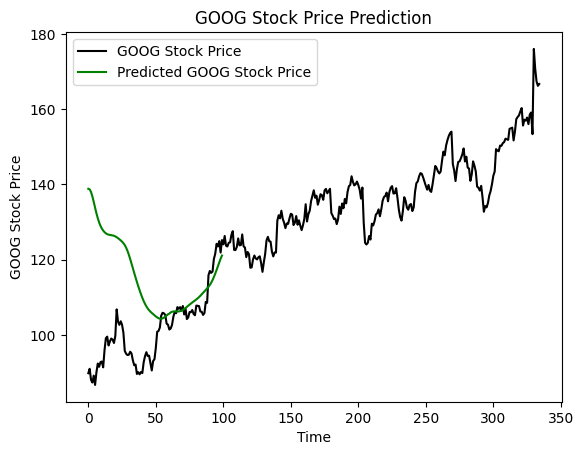

In [15]:
plt.plot(real_stock_price, color = 'black', label = 'GOOG Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [21]:
dataset_test[:100]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
...,...,...,...,...,...,...,...
95,2023-05-19,124.199997,126.478996,122.720001,123.250000,123.250000,30251300
96,2023-05-22,123.510002,127.050003,123.449997,125.870003,125.870003,29760200
97,2023-05-23,124.930000,125.419998,123.050003,123.290001,123.290001,24477900
98,2023-05-24,121.879997,122.750000,120.750000,121.639999,121.639999,23087900


In [30]:
predicted_stock_price = predicted_stock_price.reshape(predicted_stock_price.shape[0])

In [34]:
 np.save('lstm_predictions.npy', predicted_stock_price)

In [36]:
predicted_stock_price

array([138.82419 , 138.67    , 137.97873 , 136.81342 , 135.36182 ,
       133.81964 , 132.34071 , 131.02084 , 129.90173 , 128.99283 ,
       128.27971 , 127.72949 , 127.310135, 126.99609 , 126.774666,
       126.6459  , 126.56751 , 126.506294, 126.43798 , 126.33805 ,
       126.18245 , 125.9635  , 125.70599 , 125.424515, 125.11241 ,
       124.77609 , 124.383644, 123.87032 , 123.19461 , 122.33861 ,
       121.31762 , 120.17365 , 118.96219 , 117.72147 , 116.47953 ,
       115.255875, 114.07281 , 112.93405 , 111.84573 , 110.8234  ,
       109.87589 , 109.00971 , 108.24498 , 107.58351 , 107.03472 ,
       106.56611 , 106.18307 , 105.851555, 105.53777 , 105.22429 ,
       104.92101 , 104.65242 , 104.44314 , 104.32239 , 104.30922 ,
       104.39992 , 104.5909  , 104.863976, 105.17665 , 105.4622  ,
       105.673836, 105.97629 , 106.15423 , 106.23853 , 106.25134 ,
       106.2284  , 106.219955, 106.24566 , 106.32776 , 106.454185,
       106.63564 , 106.88178 , 107.1711  , 107.46683 , 107.759